In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Malaria Model
def malaria_model(y, t, params):
    Sr, Ss, Ir, Is, R, X, Y = y  # Unpack the current state
    
    #parameters
    mu, rho, beta_r, beta_s, gamma_r, gamma_s, alpha_r, alpha_s, omega, eta, lsr, lrs, delta_sr, delta_rs, c, m = params
    
    Nh = Sr + Ss + Ir + Is + R  # Total human population
    Nv = X + Y  # Total mosquito population

    # ODEs for humans
    dSr_dt = rho * mu * Nh - (1 - c) * m * beta_r * Sr * Y / Nv - mu * Sr + lsr * Ss - lrs * Sr + rho * omega * R
    dSs_dt = (1 - rho) * mu * Nh - (1 - c) * m * beta_s * Ss * Y / Nv - mu * Ss + lrs * Sr - lsr * Ss + (1 - rho) * omega * R
    dIr_dt = (1 - c) * m * beta_r * Sr * Y / Nv - (gamma_r + mu) * Ir + delta_sr * Is - delta_rs * Ir
    dIs_dt = (1 - c) * m * beta_s * Ss * Y / Nv - (gamma_s + mu) * Is + delta_rs * Ir - delta_sr * Is
    dR_dt = gamma_r * Ir + gamma_s * Is - (omega + mu) * R

    # ODEs for mosquitoes
    dX_dt = eta * Nv - (1 - c) * alpha_r * X * Ir / Nh - (1 - c) * alpha_s * X * Is / Nh - eta * X
    dY_dt = (1 - c) * alpha_r * X * Ir / Nh + (1 - c) * alpha_s * X * Is / Nh - eta * Y

    return [dSr_dt, dSs_dt, dIr_dt, dIs_dt, dR_dt, dX_dt, dY_dt]

In [3]:
# estimated Parameters
params = {
    'mu': 1 / (70 * 365),  # Natural birth/mortality rate of humans (per day)
    'rho': 0.7,  # Fraction of humans with high resistance
    'beta_r': 0.0044,  # Infection rate from mosquitoes to resistant humans
    'beta_s': 0.0066,  # Infection rate from mosquitoes to sensitive humans
    'gamma_r': 1 / 365,  # Recovery rate for resistant humans
    'gamma_s': 1 / 100,  # Recovery rate for sensitive humans
    'alpha_r': 0.0044,  # Infection rate from resistant humans to mosquitoes
    'alpha_s': 0.0062,  # Infection rate from sensitive humans to mosquitoes
    'omega': 1 / (5 * 365),  # Waning immunity rate (humans becoming susceptible again)
    'eta': 1 / 15,  # Natural birth/death rate of mosquitoes
    'lsr': 0.05,  # Rate of change from sensitive to resistant
    'lrs': 0.03,  # Rate of change from resistant to sensitive
    'delta_sr': 0.01,  # Rate of change from sensitive infected to resistant infected
    'delta_rs': 0.01,  # Rate of change from resistant infected to sensitive infected
    'c': 0.5,  # Mosquito net coverage (reducing infection rate)
    'm': 10  # Mosquito-to-human ratio
}

In [4]:
# Initial conditions: [Sr, Ss, Ir, Is, R, X, Y]
initial_conditions = [0.7, 0.2, 0.02, 0.05, 0.03, 0.9, 0.1]  # Initial population distribution

# Time points (in days)
t = np.linspace(0, 365 * 10, 1000)  # 10 years

# Solving ODEs using odeint
result = odeint(malaria_model, initial_conditions, t, args=(list(params.values()),))

# Unpacking result
Sr, Ss, Ir, Is, R, X, Y = result.T




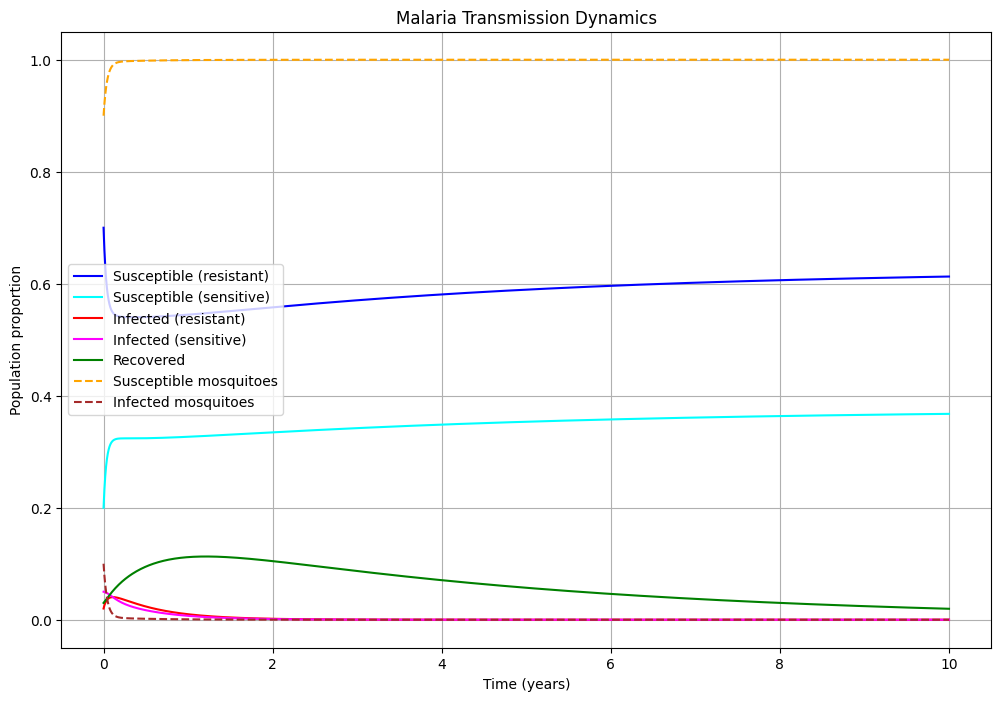

In [5]:
# Plot of results
plt.figure(figsize=(12, 8))
plt.plot(t / 365, Sr, label='Susceptible (resistant)', color='blue')
plt.plot(t / 365, Ss, label='Susceptible (sensitive)', color='cyan')
plt.plot(t / 365, Ir, label='Infected (resistant)', color='red')
plt.plot(t / 365, Is, label='Infected (sensitive)', color='magenta')
plt.plot(t / 365, R, label='Recovered', color='green')
plt.plot(t / 365, X, label='Susceptible mosquitoes', color='orange', linestyle='--')
plt.plot(t / 365, Y, label='Infected mosquitoes', color='brown', linestyle='--')
plt.xlabel('Time (years)')
plt.ylabel('Population proportion')
plt.title('Malaria Transmission Dynamics')
plt.legend()
plt.grid()
plt.show()